In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import scipy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
N = 100000
X = np.random.normal(size=N)
Y = np.random.normal(size=N)

# Order one

## Sum of two Gaussians is Gaussian

$X \sim \mathcal{N}(\mu_X, \sigma_X), Y \sim \mathcal{N}(\mu_Y, \sigma_Y) \implies X+Y \sim \mathcal{N}(\mu_X+\mu_Y, \sigma_X^2+\sigma_Y^2)$

In [3]:
def f1(x, y): 
    return x+y

def p1(x): 
    return 1/np.sqrt(4*np.pi)*np.exp(-x**2/4)

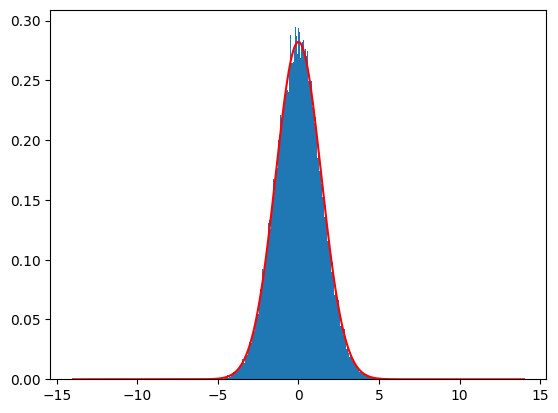

In [4]:
x = np.linspace(-14, 14, 1000)

plt.hist(f1(X,Y), bins=int(np.sqrt(N)), density=True)
plt.plot(x, p1(x), color='r')
plt.show()

# Order two
## Product of the same Gaussians is $\chi^2$
$X \sim \mathcal{N}(\mu, \sigma) \implies X^2 \sim \frac{1}{\sqrt{2\pi x}} \exp\left(-\frac{x}{2}\right)$

In [5]:
def f2(x, y): 
    return x**2

def p2(x): 
    return 1/np.sqrt(2*np.pi*x)*np.exp(-x/2)

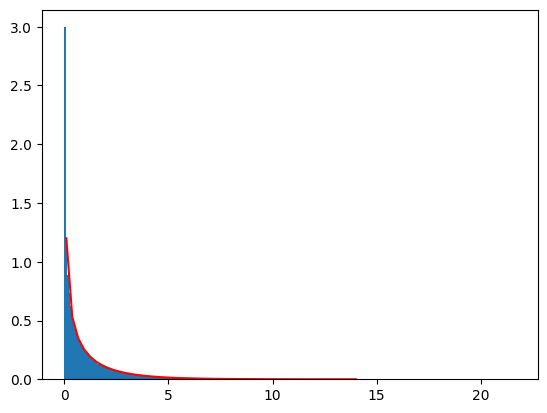

In [6]:
x = np.linspace(0.1, 14)

plt.hist(f2(X,Y), bins=int(np.sqrt(N)), density=True)
plt.plot(x, p2(x), color='r')
plt.show()

## Product of two i.i.d. Gaussians behaves $\chi^2$
Easy case: $\mathrm{var}(X) = \mathrm{var}(Y)$:

$X \sim \mathcal{N}(\mu_X, \sigma_X), Y \sim \mathcal{N}(\mu_Y, \sigma_Y) \implies XY \sim \chi^2(k=1)$

In [7]:
def f3(x, y): 
    return x*y

def p3(x): 
    return scipy.stats.chi2.pdf(x, df=1)/2 + scipy.stats.chi2.pdf(-x, df=1)/2

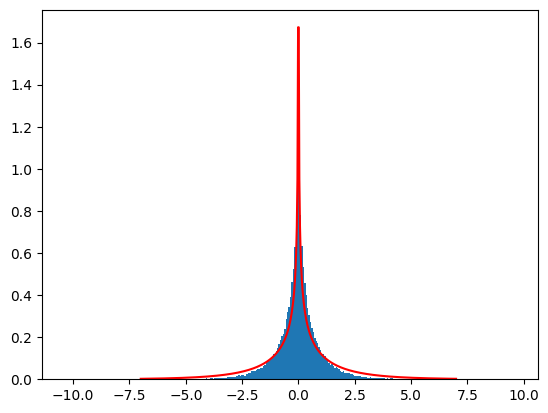

In [8]:
x = np.linspace(-7, 7, 500)

plt.hist(f3(X,Y), bins=int(np.sqrt(N)), density=True)
plt.plot(x, p3(x), color='r')
plt.show()

# Order four

## Next 
$X \sim \mathcal{N}(\mu_X, \sigma_X), Y \sim \mathcal{N}(\mu_Y, \sigma_Y) \implies X^2 + Y^2\sim \chi^2(k=1)$

In [11]:
def f5(x, y): 
    return x**2 + y**2

def p5(x): 
    return 1/(np.pi*x) * scipy.special.kn(0, np.sqrt(x))

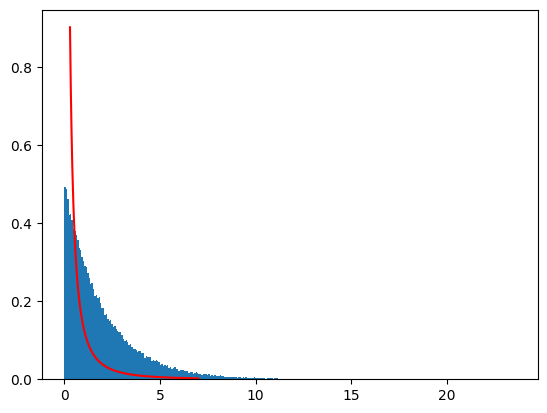

In [12]:
x = np.linspace(0.3, 7, 500)

plt.hist(f5(X,Y), bins=int(np.sqrt(N)), density=True)
plt.plot(x, p5(x), color='r')
plt.show()

## Arbitray sum of degree of two Gaussian variables

$X \sim \mathcal{N}(\mu_X, \sigma_X), Y \sim \mathcal{N}(\mu_Y, \sigma_Y) \implies X^2 + Y^2 + XY$

In [13]:
def f6(x, y): 
    return x**2 + y**2 + x*y

def p6(x): 
    return 1/(np.pi*x) * scipy.special.kn(0, np.sqrt(x))

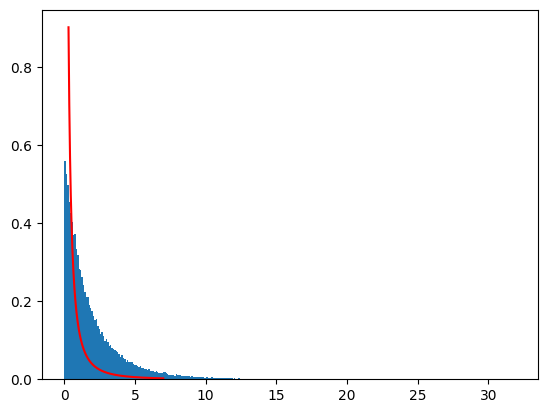

In [14]:
x = np.linspace(0.3, 7, 500)

plt.hist(f6(X,Y), bins=int(np.sqrt(N)), density=True)
plt.plot(x, p6(x), color='r')
plt.show()

## Product of two $\chi^2(k=1)$ behaves according to modified Bessel function 
$X, Y \sim \chi_2(k=1) = \frac{1}{\sqrt{2\pi x}} \exp\left(-\frac{x}{2}\right) \implies XY \sim \frac{1}{\pi x} K_0(\sqrt{x})$

In [9]:
def f4(x, y): 
    return x**2*y**2

def p4(x): 
    return 1/(np.pi*x) * scipy.special.kn(0, np.sqrt(x))

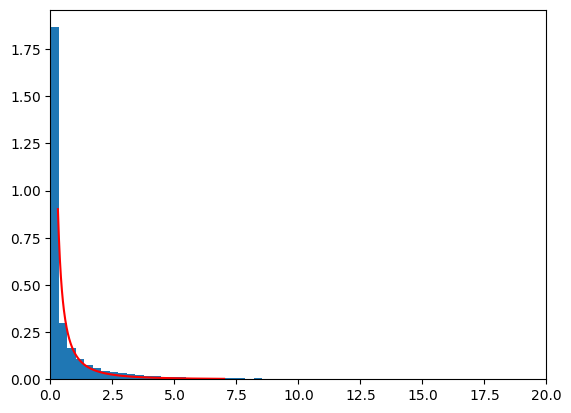

In [10]:
x = np.linspace(0.3, 7, 500)

plt.hist(f4(X,Y), bins=int(np.sqrt(N)), density=True)
plt.xlim(0, 20)
plt.plot(x, p4(x), color='r')
plt.show()